# Ex07 - Propriedades da DFT

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2
from scipy import signal
import sys,os
import matplotlib.image as mpimg
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

In [18]:
pwd

'/home/marcio/progs/ia898/2S2018'

### Parte 1 - Convolução periódica

Tente entender a convolução periódica [(notebook)](11 Teorema da Convolucao.ipynb), comparando-a com a convolução já estudada anteriormente (scypi.signal.convolve2d). Avalie as diferenças em um exemplo numérico pequeno e depois, utilizando uma imagem.

- Desafio opcional: crie um exemplo com uma imagem numérica pequena e um kernel 3x3. Tente obter o mesmo resultado usando a função *convp* e a função *scypi.signal.convolve2d*. Ou seja, implemente a convolução periódica a partir da convolução linear.

## Resolução

Primeiramente, vamos fazer a declaração de um array *ar* e um kernel *ker* para a realização dos testes:

In [19]:
ar = np.array([[1,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0],
             [0,0,0,1,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,1],
             [0,0,0,0,0,0,0,0,0]])

ker = np.ones((5, 5)) / 25

Fazendo a covolução através de pconv: 

In [20]:
f = np.array([[1,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0],
             [0,0,0,1,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,1],
             [0,0,0,0,0,0,0,0,0]])
print("Image (f):")
print(f)
    

print("\n Image Kernel (h):")
print(ker)
    
g1 = ia.pconv(f,ker)
print("Image Output (pconv):")
print(g1)


Image (f):
[[1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]]

 Image Kernel (h):
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
Image Output (pconv):
[[0.08 0.08 0.08 0.12 0.08 0.04 0.04 0.04 0.04]
 [0.08 0.08 0.08 0.12 0.08 0.04 0.04 0.04 0.04]
 [0.08 0.08 0.08 0.12 0.08 0.04 0.04 0.04 0.04]
 [0.08 0.08 0.08 0.12 0.08 0.04 0.04 0.04 0.04]
 [0.08 0.08 0.08 0.12 0.08 0.04 0.04 0.04 0.04]]


Fazendo a convolução através de *scypi.signal.convolve2d*:

In [21]:
g2 = signal.convolve2d(f,ker)

print("Image (f):")
print(f)

print("\n Image Kernel (h):")
print(ker)

print("\n")

print("Image Output (scipy.signal):")
print(g2)

Image (f):
[[1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]]

 Image Kernel (h):
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Image Output (scipy.signal):
[[0.04 0.04 0.04 0.04 0.04 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.04 0.04 0.04 0.04 0.04 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.04 0.04 0.04 0.08 0.08 0.04 0.04 0.04 0.   0.   0.   0.   0.  ]
 [0.04 0.04 0.04 0.08 0.08 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.08 0.08 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.   0.   0.   0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.   0.   0.   0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.04 0.04 0.04 0.04]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [22]:
print("pconv: \n",g1,'\n',"scipy: \n",g2)

pconv: 
 [[0.08 0.08 0.08 0.12 0.08 0.04 0.04 0.04 0.04]
 [0.08 0.08 0.08 0.12 0.08 0.04 0.04 0.04 0.04]
 [0.08 0.08 0.08 0.12 0.08 0.04 0.04 0.04 0.04]
 [0.08 0.08 0.08 0.12 0.08 0.04 0.04 0.04 0.04]
 [0.08 0.08 0.08 0.12 0.08 0.04 0.04 0.04 0.04]] 
 scipy: 
 [[0.04 0.04 0.04 0.04 0.04 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.04 0.04 0.04 0.04 0.04 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.04 0.04 0.04 0.08 0.08 0.04 0.04 0.04 0.   0.   0.   0.   0.  ]
 [0.04 0.04 0.04 0.08 0.08 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.08 0.08 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.   0.   0.   0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.   0.   0.   0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.04 0.04 0.04 0.04]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


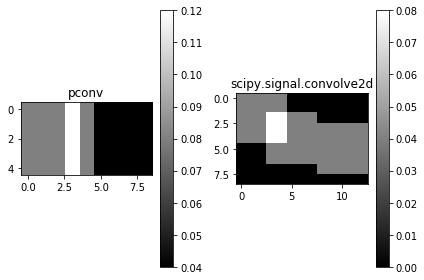

In [23]:
plt.subplot(1,2,1)
plt.title('pconv')

plt.imshow(g1,'gray')
plt.colorbar()

plt.subplot(1,2,2)
plt.title('scipy.signal.convolve2d')
plt.imshow(g2,'gray')
plt.colorbar()

plt.tight_layout()

vamos tentar agora repetir o procedimento, mas dessa vez utilizando uma imagem:

[[171.44 173.92 175.6  ... 166.   172.44 170.28]
 [175.4  176.04 176.68 ... 171.8  175.8  174.64]
 [179.12 178.36 176.52 ... 176.4  178.96 179.  ]
 ...
 [168.4  171.   173.16 ... 165.76 170.   169.04]
 [170.12 173.64 176.16 ... 165.6  169.92 168.68]
 [169.88 174.12 176.4  ... 162.64 168.64 168.48]]
Tamanho de g3:  (256, 256)

 [[ 6.76 13.48 20.44 ... 23.12 15.36  7.72]
 [13.72 27.44 41.44 ... 45.52 30.24 15.16]
 [20.56 41.4  62.28 ... 68.48 45.4  22.8 ]
 ...
 [21.36 42.68 62.68 ... 60.4  42.32 19.64]
 [14.24 28.24 40.92 ... 40.24 27.92 12.68]
 [ 6.76 13.56 19.96 ... 20.92 14.52  6.6 ]]
Tamanho de g4:  (260, 260)


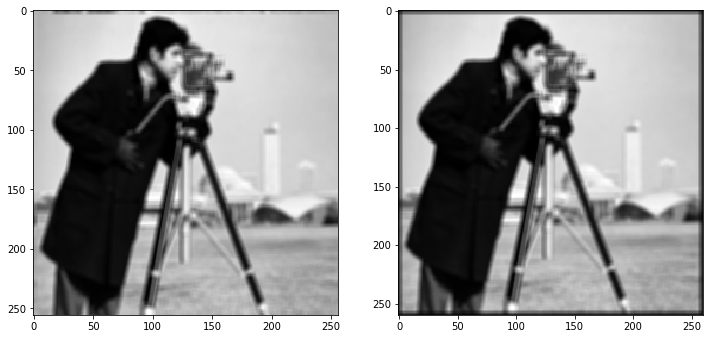

In [24]:
im = mpimg.imread('../data/cameraman.tif')

g3 = ia.pconv(im,ker)
print(g3)

print("Tamanho de g3: ",g3.shape)

g4 = signal.convolve2d(im,ker)

print("\n",g4)
print("Tamanho de g4: ",g4.shape)

plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.imshow(g3,'gray')

plt.subplot(1,2,2)
plt.imshow(g4,'gray')

Analisando as imagens acima, notamos que na primeira (em que foi utilizada a função *pconv*) há um pequeno detalhe na parte superior que corresponde na verdade à translação da parte inferior da imagem. Já na segunda imagem, esse efeito não é observado,e ela possui uma dimensão maior (260 x 260 pixels, contra 256 x 256 da primeira imagem). No teste anterior, feito com arrays de dimensão menor, conseguimos notar uma diferença das imagens com mais facilidade.

### Parte 2 - Teorema da convolução

Crie uma demonstração usando imagens para o Teorema da Convolução. Lembre-se, o objetivo é mostrar que o teorema é válido, ou seja, que $ F(f * g) = F(f) \cdot F(g) $

Para fazer essa transformação, calculemos primeiramente a convolução de duas funções, *f1* e *g1*. Para isso, vamos retomar a função **plot_circle**, utilizada para a geração de imagens sintéticas de círculos:

In [25]:
def plot_circle(W,H,radius,x_center,y_center):
    #imprimir uma circunferencia em uma figura com dimensoes WxH
    #raio: radius
    #centrada em (x_center, y_center)
    
    
    L, C = np.indices((W,H))
    func = ((L-y_center)**2 + (C-x_center)**2 < radius**2)
    
    #transformando os elementos do array de saída em inteiros para poder fazer cálculos
    func2 = func.astype('uint8')
    return func2
    #plt.figure()
    #plt.imshow(func,'gray')


Assim, vamos obter os círculos f1 e g1, de tamanhos diferentes:

In [42]:
f1 = plot_circle(256,256,50,128,128)

print(f1)
g1 = plot_circle(256,256,100,128,128)
print("\n")

print(g1)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


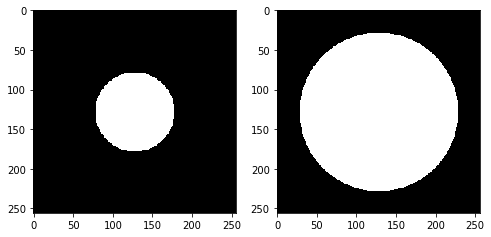

In [27]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.imshow(f1,'gray')

plt.subplot(1,2,2)
plt.imshow(g1,'gray')

Depois, vamos calcular a convolução f1 * g1 e a sua transformada de fourier, usando para isso a funçaõ **ia.pconv** :

In [89]:
# convolução f1*g1
cv0 = ia.pconv(f1,g1) 
print(cv0.shape)
#fft de f1*g1
ft0 = fft2(cv0)
print(ft0)
print(ft0.shape)


(256, 256)
[[ 2.45681525e+08+0.00000000e+00j  8.38197049e+07+9.89530236e-10j
  -1.31926351e+07-3.09569259e-10j ...  2.22701972e+05+2.37031372e-09j
  -1.31926351e+07+3.09569259e-10j  8.38197049e+07-9.89530236e-10j]
 [ 8.38197049e+07-9.40822782e-11j  1.42571243e+07+2.81278670e-10j
  -9.59648267e+06-1.61738424e-10j ... -1.09937417e+05+4.18949476e-10j
  -9.59648267e+06+1.82131796e-09j  1.42571243e+07-2.42133957e-09j]
 [-1.31926351e+07-1.82902678e-10j -9.59648267e+06-2.28791936e-10j
  -1.41732783e+05-2.16218637e-11j ... -1.34081914e+06-1.27928283e-10j
  -1.41732783e+05+3.97626762e-11j -9.59648267e+06+7.77837724e-10j]
 ...
 [ 2.22701972e+05-9.69841134e-10j -1.09937417e+05-3.56869132e-10j
  -1.34081914e+06+1.05002604e-10j ...  3.75323717e+05-5.34178673e-12j
  -1.34081914e+06+1.92912441e-10j -1.09937417e+05-6.54939348e-11j]
 [-1.31926351e+07-1.55880368e-09j -9.59648267e+06-7.77837724e-10j
  -1.41732783e+05-3.97626762e-11j ... -1.34081914e+06-2.10169169e-10j
  -1.41732783e+05+2.16218637e-11j -9

Agora, vamos calcular as tranformadas de fourier de f1 e g1, individualmente:

In [85]:
#transformadas de f1 e g1
ft_f1 = fft2(f1)
ft_g1 = fft2(g1)

print(ft_f1)
print("\n")
print(ft_g1)

[[ 7825.        +0.00000000e+00j -6446.16983003-6.74307397e-14j
   3250.06108682-1.14440106e-14j ...  -266.71903294-1.90807976e-13j
   3250.06108682-2.28975550e-14j -6446.16983003-1.11733015e-16j]
 [-6446.16983003-6.29008816e-14j  5235.30963637+8.36094451e-14j
  -2454.7260776 -2.25007634e-15j ...   -69.82064847+1.39530122e-13j
  -2454.7260776 -2.47549913e-14j  5235.30963637-1.86171826e-14j]
 [ 3250.06108682+1.17177536e-13j -2454.7260776 -8.17589439e-14j
    693.61288416+3.00604922e-14j ...   728.47432878-5.02381485e-14j
    693.61288416+2.64801569e-14j -2454.7260776 -2.74930538e-14j]
 ...
 [ -266.71903294+6.10164650e-14j   -69.82064847-4.53627023e-14j
    728.47432878+1.08460670e-13j ... -1021.77864173-1.09682063e-13j
    728.47432878+1.02940266e-13j   -69.82064847-1.59536309e-13j]
 [ 3250.06108682+3.27498044e-13j -2454.7260776 -2.24332784e-13j
    693.61288416+4.39987605e-14j ...   728.47432878+2.35759552e-14j
    693.61288416+5.21150209e-14j -2454.7260776 -1.97278428e-13j]
 [-6446.16

Em seguida, vamos fazer o produto das transformadas *ft_f1* e *ft_g1* :

In [86]:
ft1 = ft_f1 * ft_g1
print(ft1)
print(ft1.shape,"\n")


[[ 2.45681525e+08+0.00000000e+00j  8.38197049e+07+1.45871334e-09j
  -1.31926351e+07+4.42996559e-11j ...  2.22701972e+05+2.71195110e-10j
  -1.31926351e+07+3.38196441e-10j  8.38197049e+07+4.86583256e-10j]
 [ 8.38197049e+07+1.21551455e-09j  1.42571243e+07+1.60840773e-11j
  -9.59648267e+06-1.64855876e-11j ... -1.09937417e+05+2.11816515e-10j
  -9.59648267e+06-1.53961027e-11j  1.42571243e+07+1.00707472e-09j]
 [-1.31926351e+07-6.31493370e-10j -9.59648267e+06-8.67118461e-10j
  -1.41732783e+05+4.87788074e-13j ... -1.34081914e+06+1.29267167e-10j
  -1.41732783e+05+2.54906429e-11j -9.59648267e+06+1.15221266e-10j]
 ...
 [ 2.22701972e+05-7.14158349e-11j -1.09937417e+05-7.70758033e-11j
  -1.34081914e+06-3.79869753e-10j ...  3.75323717e+05+7.05019489e-11j
  -1.34081914e+06-3.88472917e-10j -1.09937417e+05-2.55326416e-10j]
 [-1.31926351e+07-2.46433491e-09j -9.59648267e+06-2.49181932e-09j
  -1.41732783e+05-3.63813648e-11j ... -1.34081914e+06-1.29029357e-10j
  -1.41732783e+05-1.43922913e-11j -9.59648267e+

Finalmente, podemos fazer a subtração dos resultados para conferir se o teorema foi provado :

In [94]:
fft0 = ia.normalize(abs(ft0))
fft1 = ia.normalize(abs(ft1))

print("F(f1*g1): \n",fft0)
print("\n\n")

print("F(f1)*F(g1): \n",fft1,"\n")

if(not(fft1-fft0).all()):
    print("fft1-fft0:")
    print(fft1-fft0)
    print("\nOs dois resultados obtidos são iguais!")

else:
    print("[ERRO]Os resultados obtidos foram diferentes!")

F(f1*g1): 
 [[255  86  13 ...   0  13  86]
 [ 86  14   9 ...   0   9  14]
 [ 13   9   0 ...   1   0   9]
 ...
 [  0   0   1 ...   0   1   0]
 [ 13   9   0 ...   1   0   9]
 [ 86  14   9 ...   0   9  14]]



F(f1)*F(g1): 
 [[255  86  13 ...   0  13  86]
 [ 86  14   9 ...   0   9  14]
 [ 13   9   0 ...   1   0   9]
 ...
 [  0   0   1 ...   0   1   0]
 [ 13   9   0 ...   1   0   9]
 [ 86  14   9 ...   0   9  14]] 

fft1-fft0:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Os dois resultados obtidos são iguais!


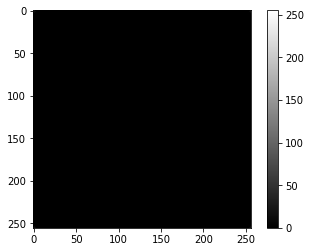

In [95]:
plt.imshow(fft1,'gray')
plt.colorbar()

### Parte3 - Decomposição de uma imagem em senóides

Implemente uma função para demonstrar a decomposição/composição de uma imagem a partir da DFT. A ideia consiste em ter 4 figuras por iteração: 

- imagem original, 
- imagem recomposta até aquela iteração, 
- espectro de Fourier, e 
- última componente ("telha") a ser adicionada. 

A medida que um novo par *F(u,v)* e *F(-u,-v)* em cada iteração é adicionado para compor a imagem original, o par deve ser mostrado na janela do espectro de Fourier e na forma de imagem ("telha"). A ordem de pegar estas frequências pode ser uma varredura quadrada em torno do centro do espectro. Lembrar de pegar sempre um par simétrico da DFT, *F(u,v)* e *F(-u,-v)*. A função deverá receber como parâmetro de entrada quantas iterações serão realizadas, ou seja, quantas componentes serão adicionadas para compor a imagem original. 